In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [2]:
df1=pd.read_csv('D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/5_Multi Linear Regression/ToyotaCorolla.csv',encoding='latin1')
#df1   # after setting letin 1

In [3]:
df1_edited=df1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1_edited

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
df1_edited.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [5]:
df1_edited.info()  # Checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


##### Note: Here, All datatypes are same and correct.

In [6]:
df1_edited.isnull().sum()       # Checking for NUll Values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

#### Observations: 
No null values

In [7]:
df2=df1_edited.copy()   # Renaming the columns
df2=df2.rename({"Age_08_04":'Age',"Quarterly_Tax":'QT',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df2.head()


,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Visualizing missing value

<AxesSubplot:>

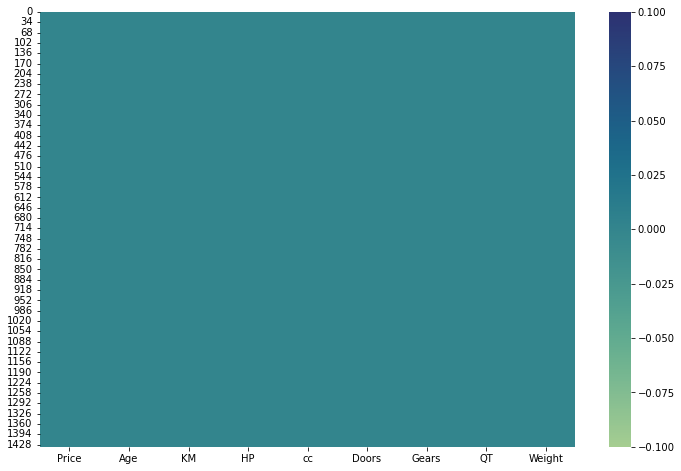

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.isnull(),cmap='crest')

No missing values are present in the dataset

In [9]:
df2[df2.duplicated()].shape

(1, 9)

In [10]:
df2[df2.duplicated()]
##Observation: There are duplicate vaues present so we dropped that values.

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
df2=df2.drop_duplicates().reset_index(drop=True)
df2[df2.duplicated()]     # Dropped the values

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight


### Discrete and continous Features 

In [12]:
discrete_feature=[feature for feature in df2.columns if len(df2[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 5
['HP', 'cc', 'Doors', 'Gears', 'QT']


In [13]:
continuous_feature=[feature for feature in df2.columns if df2[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

Continuous Feature Count 4
['Price', 'Age', 'KM', 'Weight']


### Exploratory Data Analysis

In [14]:
import pylab
def plot_df(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

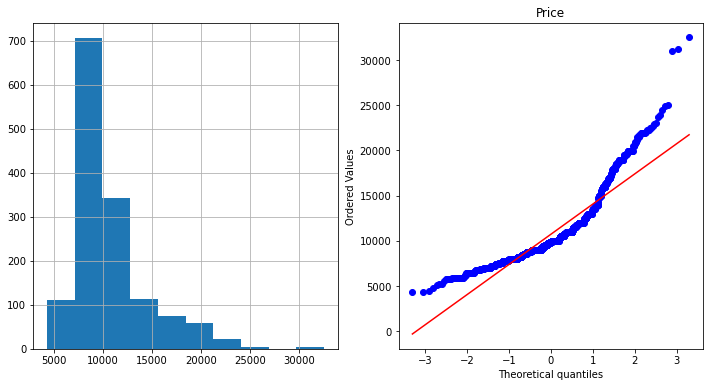

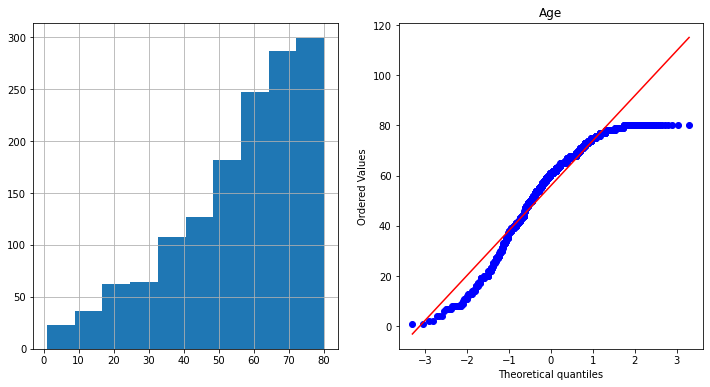

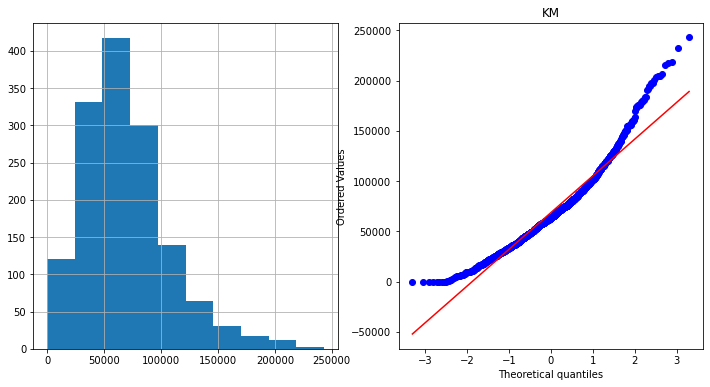

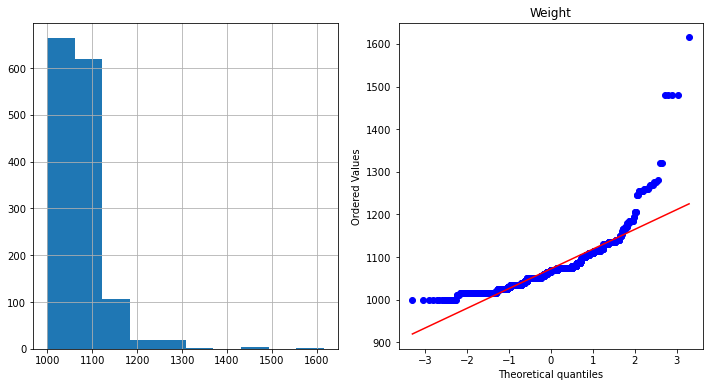

In [15]:
plot_df(df2,'Price')
plt.title('Price')
plot_df(df2,'Age')
plt.title('Age')
plot_df(df2,'KM')
plt.title('KM')
plot_df(df2,'Weight')
plt.title('Weight')

### Log Transformation 

Text(0.5, 1.0, 'Weight')

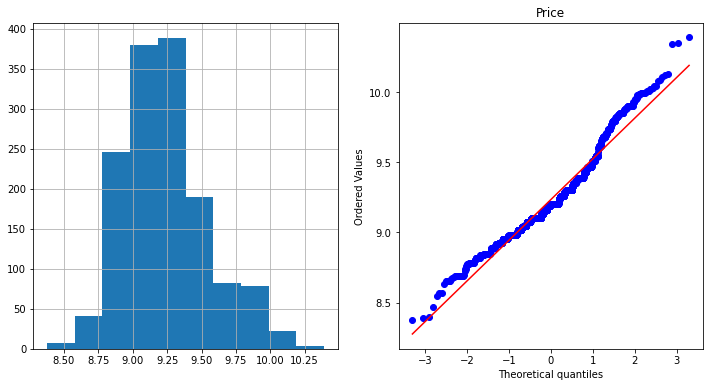

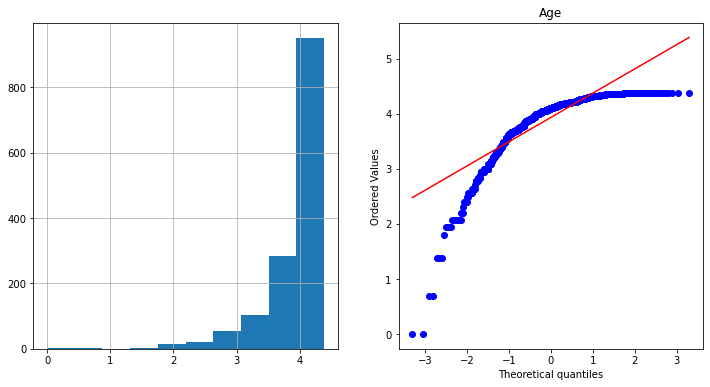

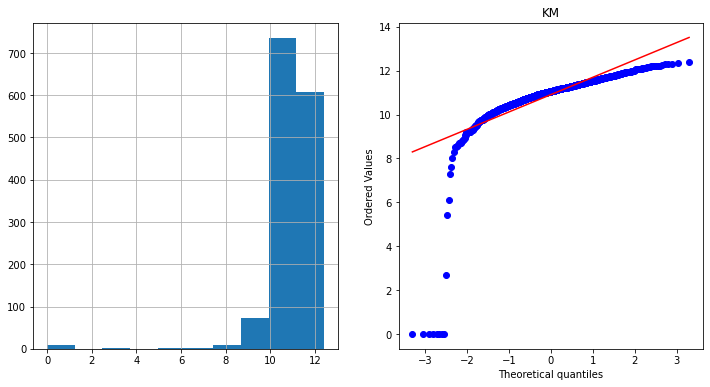

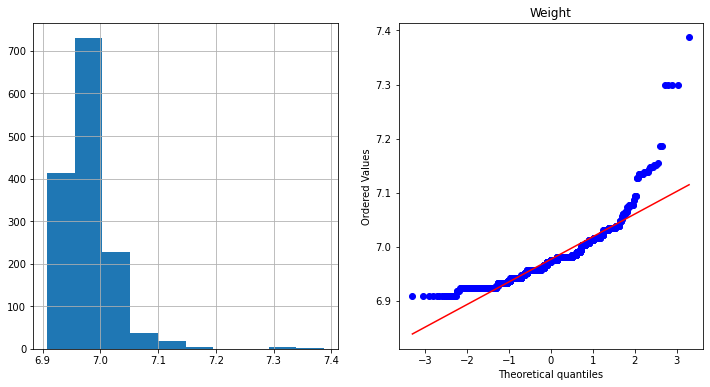

In [16]:
df_log=df2.copy()
df_log[continuous_feature]=np.log(df_log[continuous_feature])
plot_df(df_log,'Price')
plt.title('Price')
plot_df(df_log,'Age')
plt.title('Age')
plot_df(df_log,'KM')
plt.title('KM')
plot_df(df_log,'Weight')
plt.title('Weight')

### Square Root Transformation

Text(0.5, 1.0, 'Weight')

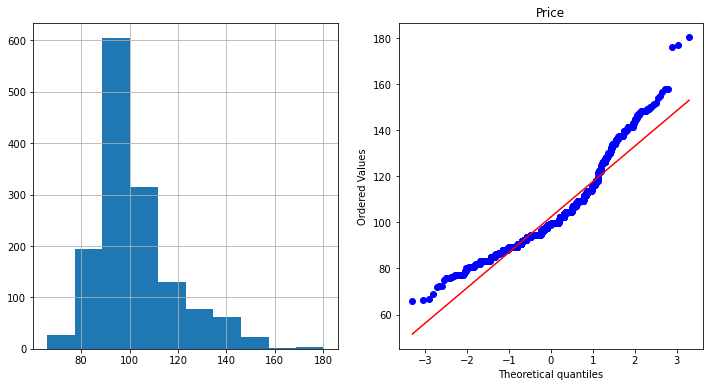

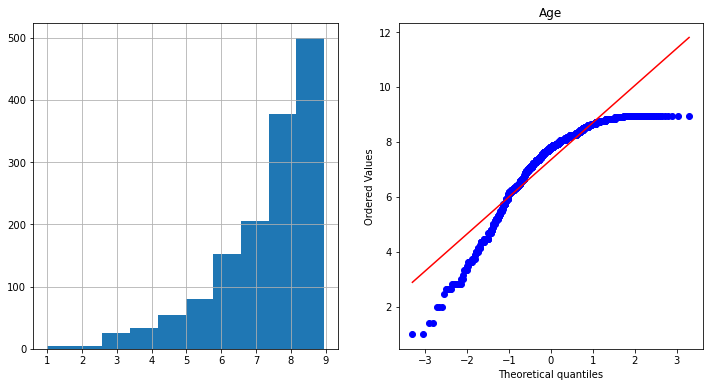

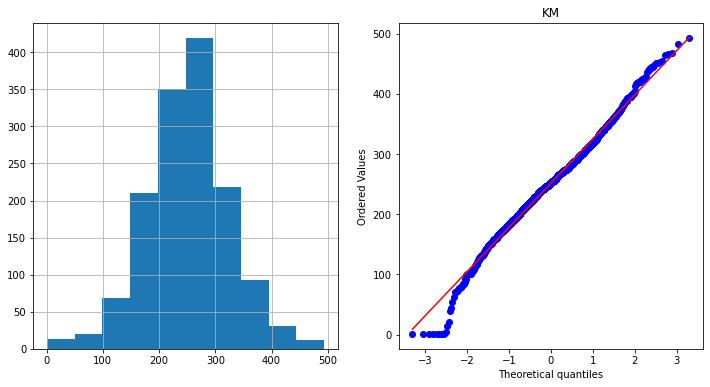

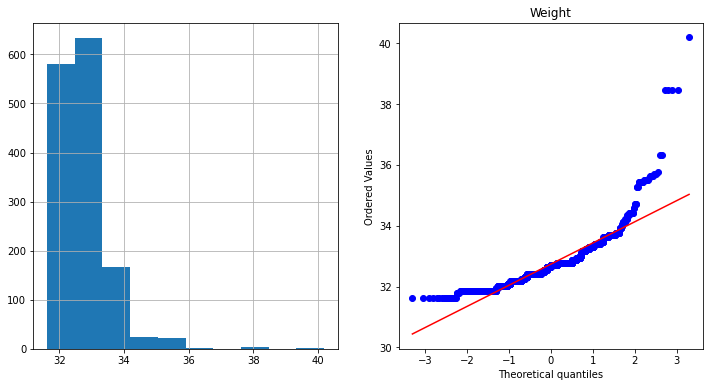

In [17]:
df_sqrt=df2.copy()
df_sqrt[continuous_feature]=np.sqrt(df_sqrt[continuous_feature])
plot_df(df_sqrt,'Price')
plt.title('Price')
plot_df(df_sqrt,'Age')
plt.title('Age')
plot_df(df_sqrt,'KM')
plt.title('KM')
plot_df(df_sqrt,'Weight')
plt.title('Weight')

### Cuberoot Transformation

Text(0.5, 1.0, 'Weight')

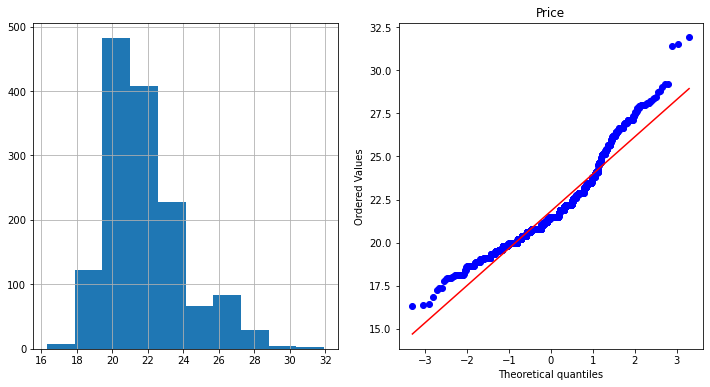

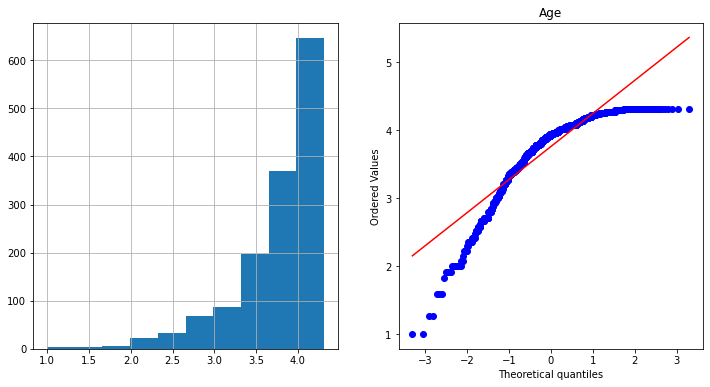

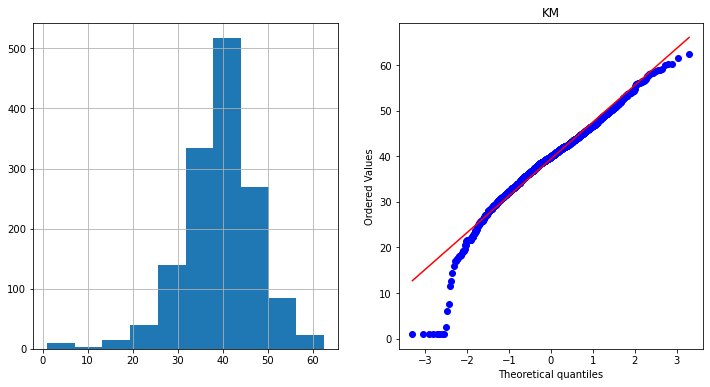

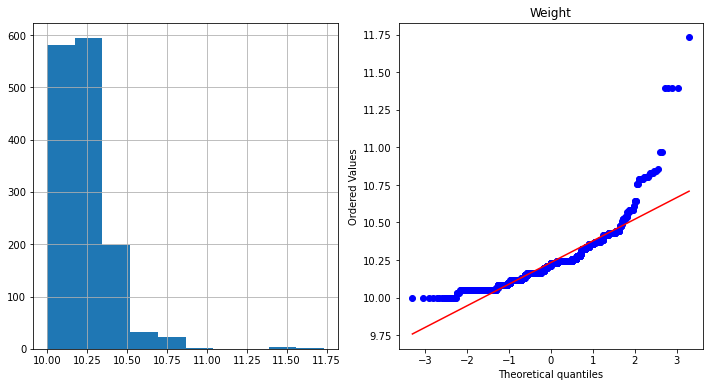

In [18]:
df_cubert=df2.copy()
df_cubert[continuous_feature]=np.cbrt(df_cubert[continuous_feature])
plot_df(df_cubert,'Price')
plt.title('Price')
plot_df(df_cubert,'Age')
plt.title('Age')
plot_df(df_cubert,'KM')
plt.title('KM')
plot_df(df_cubert,'Weight')
plt.title('Weight')

### Observations:
Most of continous features visually do not look normally distributed.

### The Shapiro–Wilk test to check normal distribution of continous features hypothetically

In [19]:
df2.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [20]:
from scipy.stats import shapiro      # scipy.stats.shapiro() used to calculate p-value
 
#perform Shapiro-Wilk test
print('Price feature',shapiro(df2.Price),'\n'
     'Age feature',shapiro(df2.Age),'\n'
     'Weight feature',shapiro(df2.Weight),'\n'
     'KM feature',shapiro(df2.KM))

Price feature ShapiroResult(statistic=0.8534726500511169, pvalue=1.5959173670279415e-34) 
Age feature ShapiroResult(statistic=0.9266955256462097, pvalue=6.739428532958423e-26) 
Weight feature ShapiroResult(statistic=0.7825545072555542, pvalue=5.042992913412152e-40) 
KM feature ShapiroResult(statistic=0.947583794593811, pvalue=3.4451158696360995e-22)


### Observations:
As p-value for all features are less than 0.05, so we will reject null hypothesis
Null Hypothesis: All features are normally distributed
As seen above, all continous features are not normally distributed.

### Visualizing the Relation between each independent Feature with respect to the Dependent Feature
Here, Price is dependent feature on independent features i.e. Age,Weight,KM

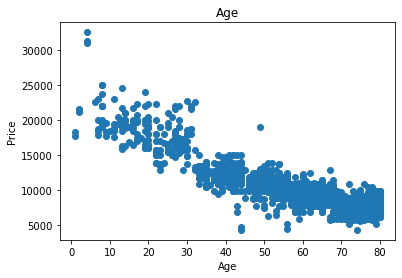

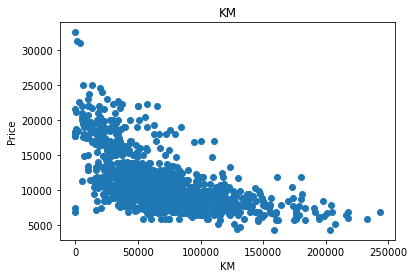

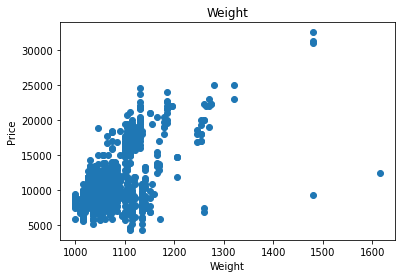

In [21]:
for feature in continuous_feature:
    if feature!="Price":
        feature_scatter=df2.copy()         
        plt.scatter(feature_scatter[feature],feature_scatter['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

### Observations:
A good linear and negative relation between Age and Price

### Analyze the relationship between the discrete variables and price

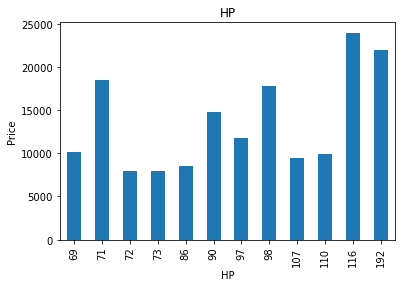

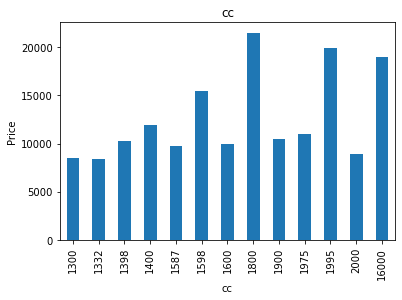

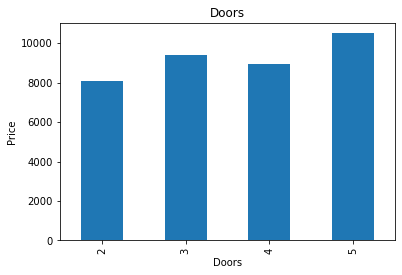

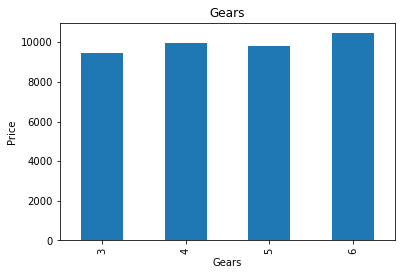

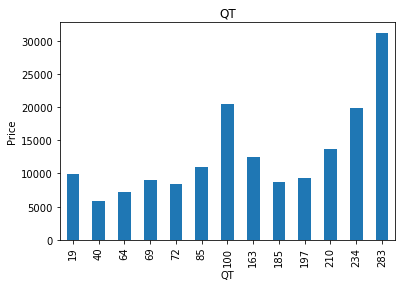

In [22]:
for feature in discrete_feature:
    disc_feature=df2.copy()
    disc_feature.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

### Observations:
As seen in the above figure, doors and gears are not affecting price.

## Outlier Detection

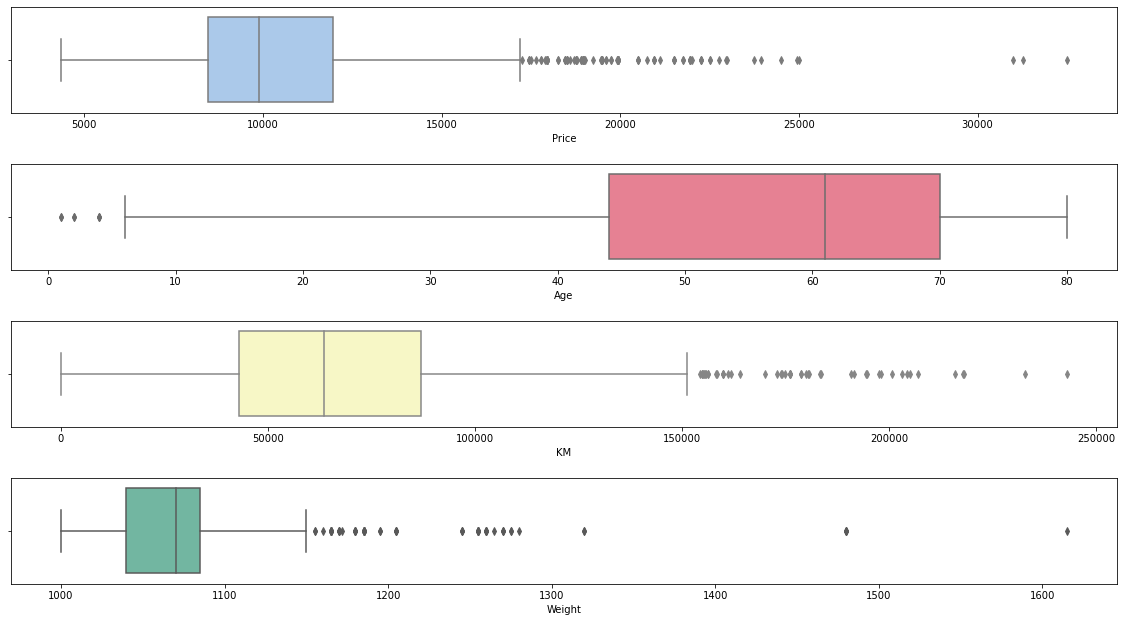

In [23]:
df_outlier=df2.copy() 
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df_outlier,palette='pastel',ax=axes[0])
sns.boxplot(x='Age',data=df_outlier,palette='husl',ax=axes[1])
sns.boxplot(x='KM',data=df_outlier,palette='Spectral',ax=axes[2])
sns.boxplot(x='Weight',data=df_outlier,palette='Set2',ax=axes[3])
plt.tight_layout(pad=2.0)

### Observations:
A significant amount of outliers are present in each continous features.
Let's try different type of transformation/imputations to deal with outliers
Mean imputation
Meadian imputation
Removing outlier

### Mean Imputation

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


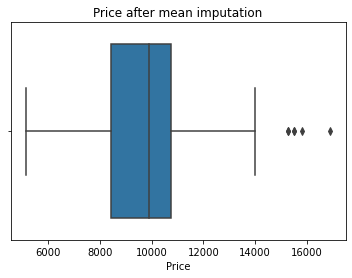

In [24]:
# To impute mean in place of outlier
df_mean=df2.copy()
### Mean imputation and box plot after imputation
### Price feature
for j in df2['Price']:
    q1 = np.quantile(df_mean.Price,0.25)
    q3 = np.quantile(df_mean.Price,0.75)
    mea = np.mean(df_mean.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if j > upper_bound or j < lower_bound:
        df_mean['Price'] = df_mean['Price'].replace(j, np.mean(df1['Price']))
sns.boxplot(df_mean['Price'])
plt.title('Price after mean imputation')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


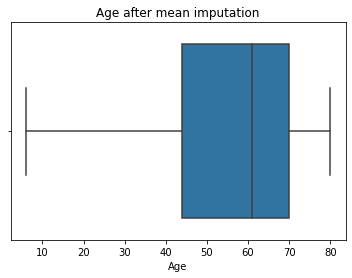

In [25]:
### Mean imputation and box plot after imputation
### Age Feature
for j in df2['Age']:
    q1 = np.quantile(df_mean.Age,0.25)
    q3 = np.quantile(df_mean.Age,0.75)
    mea = np.mean(df_mean.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if j > upper_bound or j < lower_bound:
        df_mean['Age'] = df_mean['Age'].replace(j, np.mean(df_mean['Age']))
sns.boxplot(df_mean['Age'])
plt.title('Age after mean imputation')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


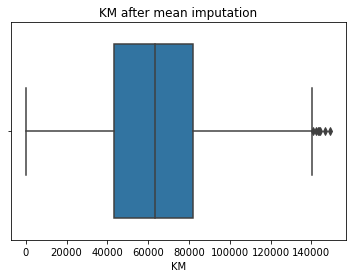

In [26]:
### for KM feature
for j in df2['KM']:
    q1 = np.quantile(df_mean.KM,0.25)
    q3 = np.quantile(df_mean.KM,0.75)
    mea = np.mean(df_mean.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if j > upper_bound or j < lower_bound:
        df_mean['KM'] = df_mean['KM'].replace(j, np.mean(df_mean['KM']))
sns.boxplot(df_mean['KM'])
plt.title('KM after mean imputation')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


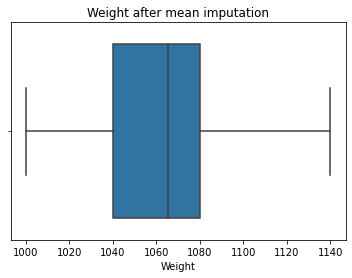

In [27]:
### for Weight feature
for j in df2['Weight']:
    q1 = np.quantile(df_mean.Weight,0.25)
    q3 = np.quantile(df_mean.Weight,0.75)
    mea = np.mean(df_mean.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if j > upper_bound or j < lower_bound:
        df_mean['Weight'] = df_mean['Weight'].replace(j, np.mean(df_mean['Weight']))
sns.boxplot(df_mean['Weight'])
plt.title('Weight after mean imputation')
plt.show()

### Let's build model for mean imputed data

In [28]:
model_after_mean_imputation = sm.ols("Price~Age+KM+Weight", data = df_mean).fit()
# Finding rsquared values
model_after_mean_imputation.rsquared , model_after_mean_imputation.rsquared_adj 

(0.461361037555002, 0.4602318154115115)

### Median Imputation

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


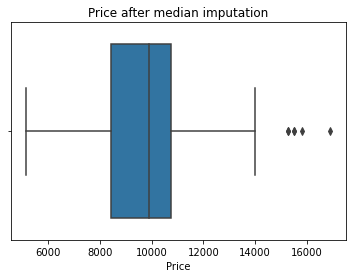

In [29]:
df_median=df2.copy()
### Median imputation and box plot after imputation
### Price feature
for j in df2['Price']:
    q1 = np.quantile(df_median.Price,0.25)
    q3 = np.quantile(df_median.Price,0.75)
    med = np.median(df_median.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if j > upper_bound or j < lower_bound:
        df_median['Price'] = df_median['Price'].replace(j, np.median(df_median['Price']))
sns.boxplot(df_median['Price'])
plt.title('Price after median imputation')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


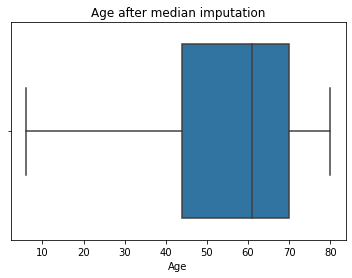

In [30]:
### Age feature
for j in df2['Age']:
    q1 = np.quantile(df_median.Age,0.25)
    q3 = np.quantile(df_median.Age,0.75)
    med = np.median(df_median.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if j > upper_bound or j < lower_bound:
        df_median['Age'] = df_median['Age'].replace(j, np.median(df_median['Age']))
sns.boxplot(df_median['Age'])
plt.title('Age after median imputation')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


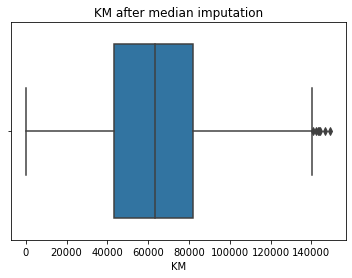

In [31]:
### KM feature
for j in df2['KM']:
    q1 = np.quantile(df_median.KM,0.25)
    q3 = np.quantile(df_median.KM,0.75)
    med = np.median(df_median.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if j > upper_bound or j < lower_bound:
        df_median['KM'] = df_median['KM'].replace(j, np.median(df_median['KM']))
sns.boxplot(df_median['KM'])
plt.title('KM after median imputation')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


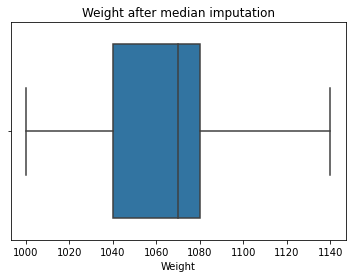

In [32]:
## Weight Feature
for j in df2['Weight']:
    q1 = np.quantile(df_median.Weight,0.25)
    q3 = np.quantile(df_median.Weight,0.75)
    med = np.median(df_median.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if j > upper_bound or j < lower_bound:
        df_median['Weight'] = df_median['Weight'].replace(j, np.median(df_median['Weight']))
sns.boxplot(df_median['Weight'])
plt.title('Weight after median imputation')
plt.show()

### Let's build model for mean imputed data

In [33]:
model_after_median_imputation = sm.ols("Price~Age+KM+Weight", data = df_median).fit()
# Finding rsquared values
model_after_median_imputation.rsquared , model_after_median_imputation.rsquared_adj 

(0.34204996085646144, 0.3406706106695777)

### Observations:
Even after mean and median imputation, r squared value of models have not improved. So, let's remove the outlier and check the model performance

### Removal of Outlier

In [34]:
df_rem_outlier=df2.copy()

In [35]:
def drop_outliers(data, field_name):
    q1 = np.quantile(data[field_name],0.25)
    q3 = np.quantile(data[field_name],0.75)
    iqr = 1.5*(q3-q1)
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price after removing outliers')

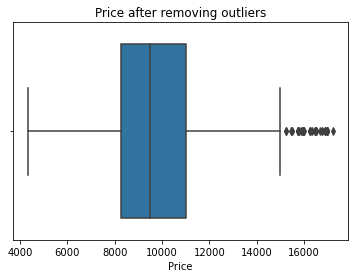

In [36]:
drop_outliers(df_rem_outlier, 'Price')
sns.boxplot(df_rem_outlier.Price)
plt.title('Price after removing outliers')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age after removing outliers')

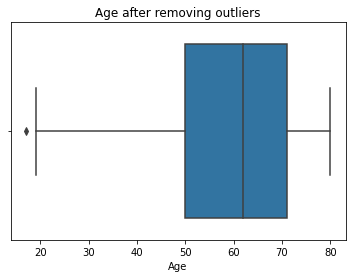

In [37]:
drop_outliers(df_rem_outlier, 'Age')
sns.boxplot(df_rem_outlier.Age)
plt.title('Age after removing outliers')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'KM after removing outliers')

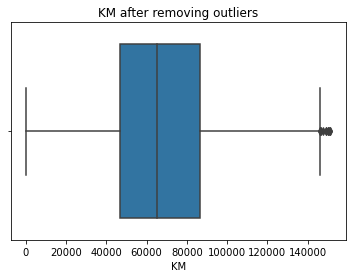

In [38]:
drop_outliers(df_rem_outlier, 'KM')
sns.boxplot(df_rem_outlier.KM)
plt.title('KM after removing outliers')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weight after removing outliers')

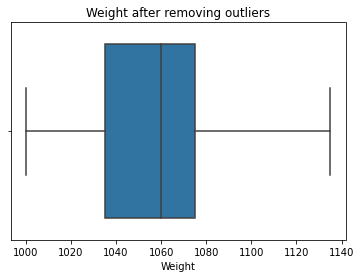

In [39]:
drop_outliers(df_rem_outlier, 'Weight')
sns.boxplot(df_rem_outlier.Weight)
plt.title('Weight after removing outliers')

In [40]:
### Build Model

In [41]:
model_after_removal_outlier = sm.ols("Price~Age+KM+Weight", data = df_rem_outlier).fit()
# Finding rsquared values
model_after_removal_outlier.rsquared , model_after_removal_outlier.rsquared_adj

(0.7776886294411589, 0.7771455234870249)

In [42]:
### Raw data model after considering all continous and discrete features
raw_data_model = sm.ols("Price~Age+KM+Weight+HP+cc+Gears+QT+Doors", data = df2).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:40:51   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Deletion Diagnostics

### Detecting Influencers/Outliers
Cook’s Distance 

In [43]:
model_influence = raw_data_model.get_influence()
(c, _) = model_influence.cooks_distance

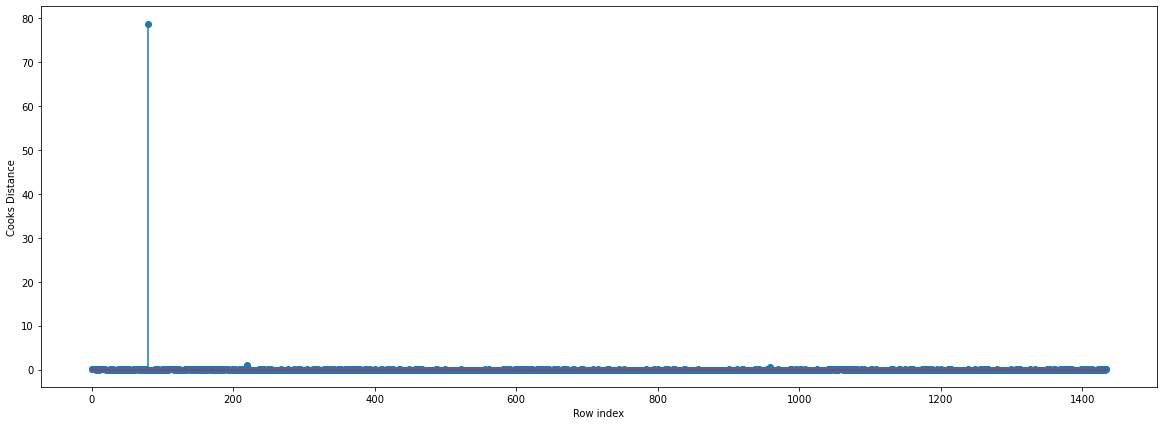

In [44]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.7295058224947)

In [46]:
#Let's drop the data point where c is more than .5
df4=df2.drop(df2.index[[80]],axis=0)
df4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


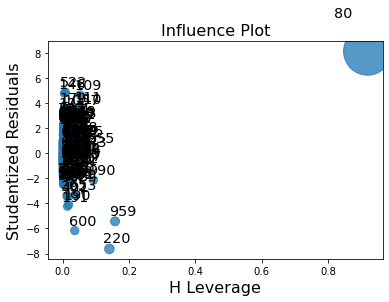

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(raw_data_model)
plt.show()

In [48]:
k = df2.shape[1]
n = df2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.020905923344947737


In [49]:
##Let's use for method to detect and remove outlier using cook's method

In [50]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=sm.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=df2).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df2
    else:
        final_model=sm.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=df2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8681163912634053
Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is impro

### Let's use Standard Scalor method to convert into normal distribution

In [51]:
from sklearn.preprocessing import StandardScaler

col_names = df2.columns
features = df2[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [52]:
### Let's Build the model
model = sm.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:40:59   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.398e-16      0.009  -2.76e-14      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
cc            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumption
1. There must be linear relationship between outcome and independent variables
2.Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.
3. No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.
Let's check each one by one.

### 1. Checking rellationship between outcome and independent variables
Scatterplot among variables and Histograms

eval_env: 1


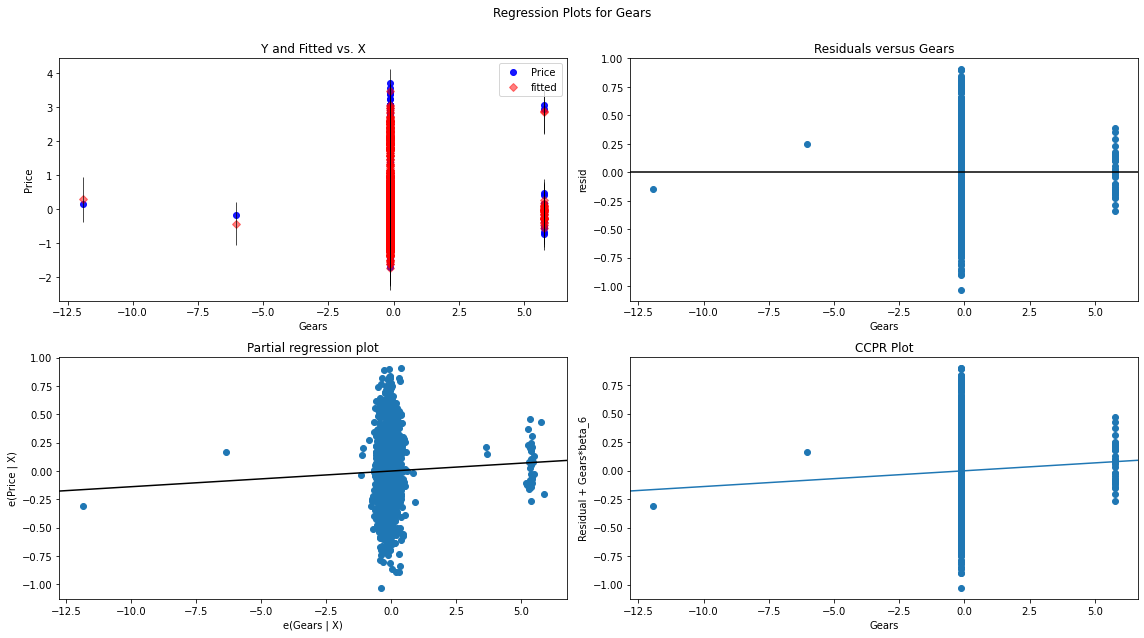

In [53]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

eval_env: 1


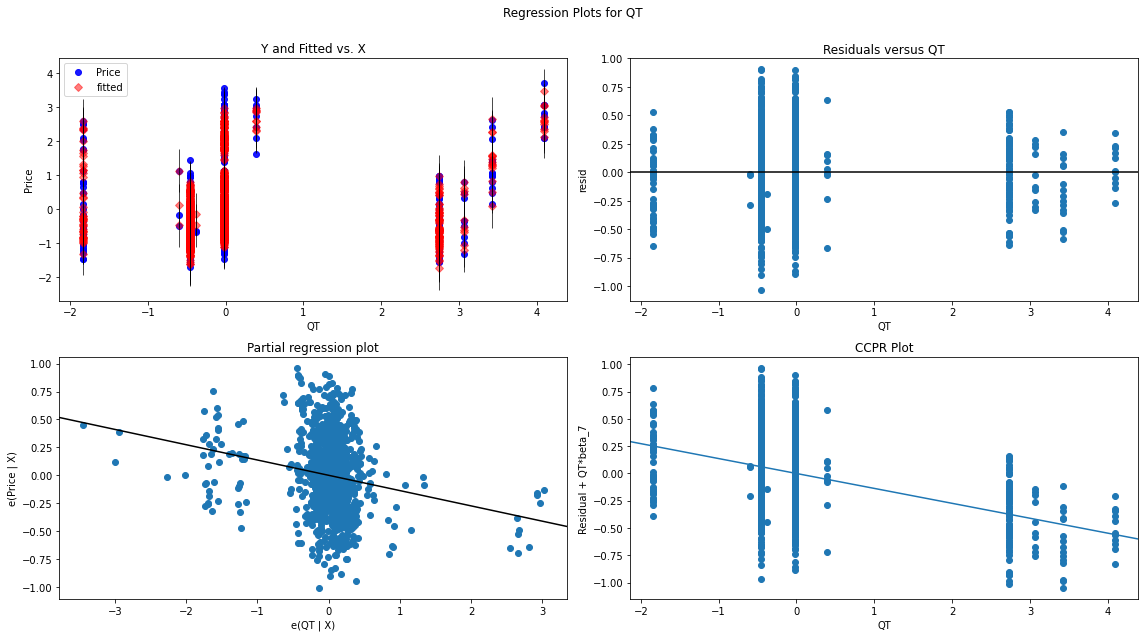

In [54]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

eval_env: 1


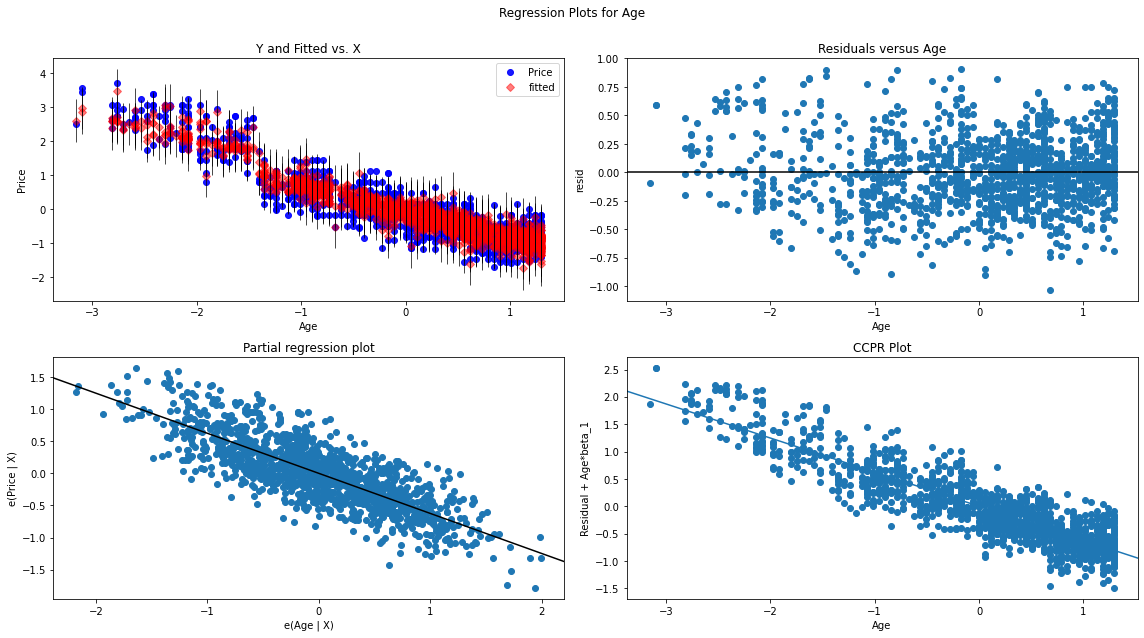

In [55]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

eval_env: 1


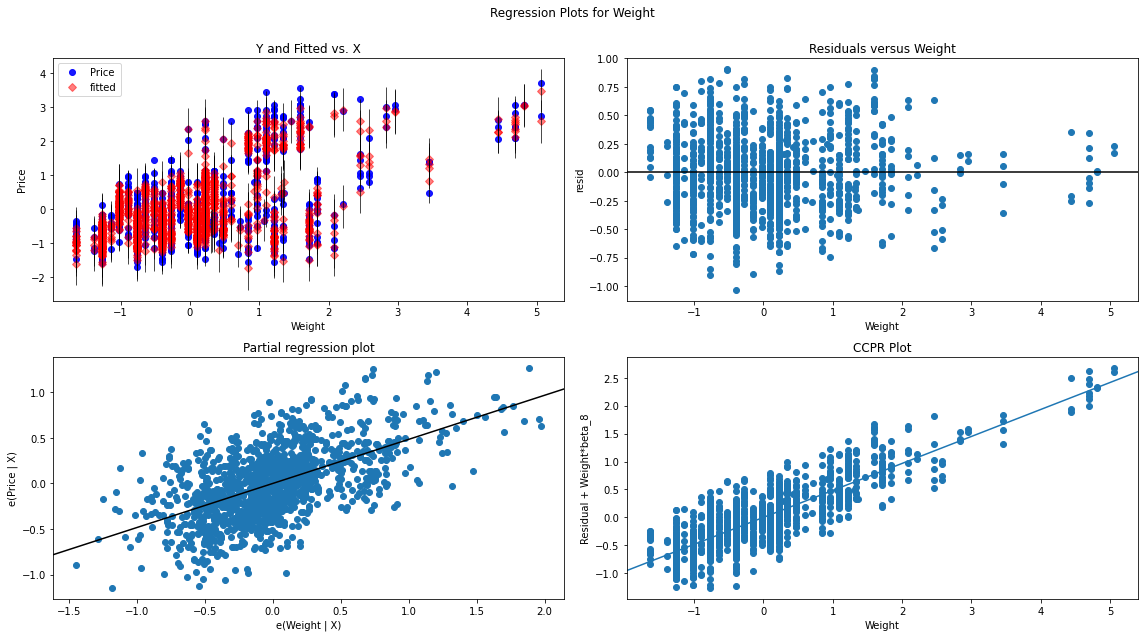

In [56]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

eval_env: 1


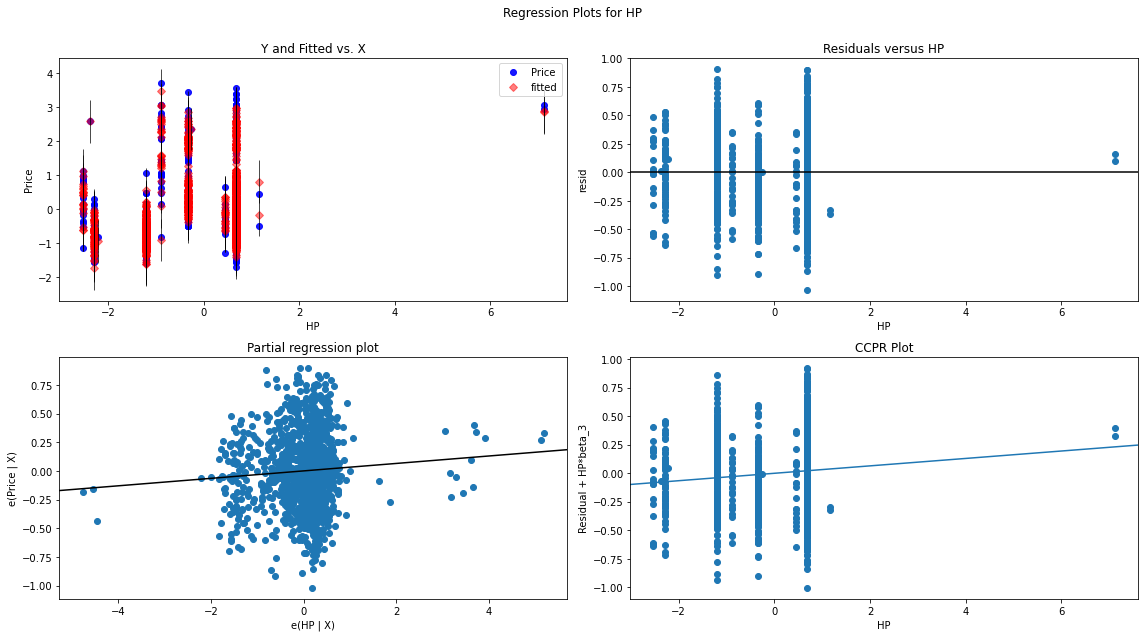

In [64]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

eval_env: 1


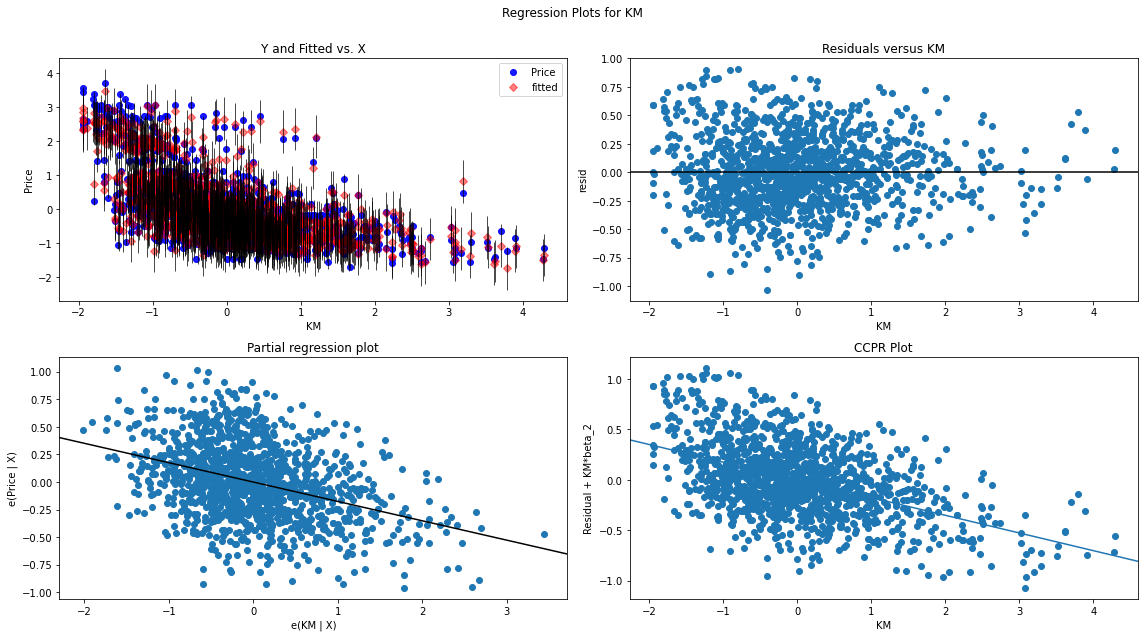

In [65]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

eval_env: 1


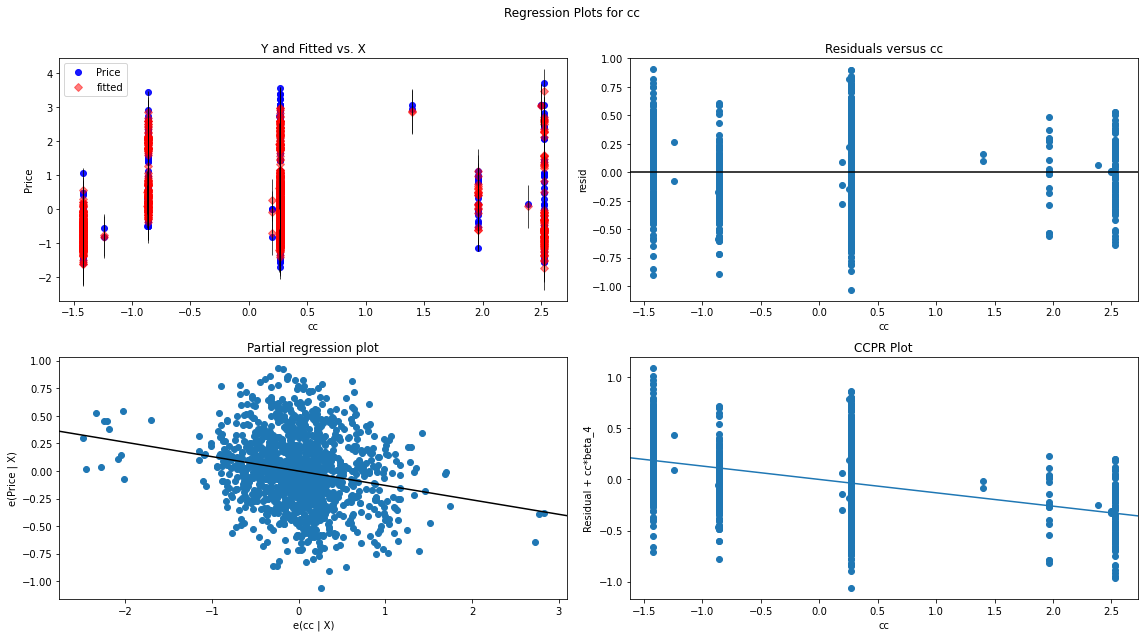

In [66]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(model, 'cc', fig=fig)
plt.show()

eval_env: 1


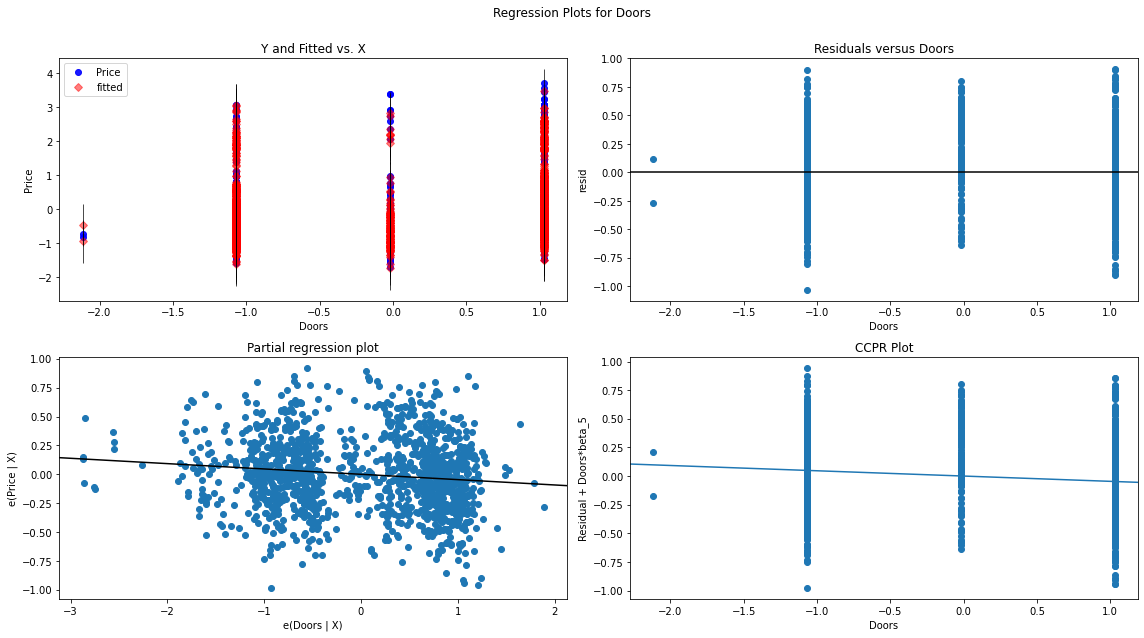

In [67]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

### Observations


Only Age and KM have linear relationship with price, while others don't have linear relationship.

### Let's calculate VIF to check multicollinearity


In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['Price'], axis=1)
r_sqr_age = sm.ols('Age~HP+Weight+cc+Doors+QT+Gears+KM', df2).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = sm.ols('Weight~HP+Age+cc+Doors+QT+Gears+KM', df2).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = sm.ols('cc~HP+Weight+Age+Doors+QT+Gears+KM', df2).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = sm.ols('HP~Age+Weight+cc+Doors+QT+Gears+KM', df2).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = sm.ols('QT~HP+Weight+cc+Doors+Age+Gears+KM', df2).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = sm.ols('KM~HP+Weight+cc+Doors+QT+Gears+Age', df2).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = sm.ols('Gears~HP+Weight+cc+Doors+QT+Age+KM', df2).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = sm.ols('Doors~HP+Weight+cc+Age+QT+Gears+KM', df2).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [58]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','QT','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

,VIF
Variables,
Gears,1.075124
Doors,1.336868
KM,1.858592
Age,2.091177
HP,2.094861
CC,3.725960
Weight,4.744228
QT,4.863714


In [59]:
## As we can observe, each feature has VIF<5, so no multicolinearity is present

### Residual Analysis (Q-Q plot#Residuals values  = y - yhat


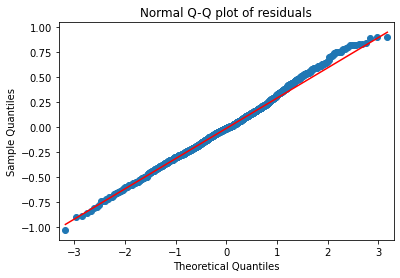

In [68]:
smf.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

### Observation:
The error is normally/gaussian ~N(0,1) are independently and identically distributed 

### Residual Plot for Homoscedasticity

In [69]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

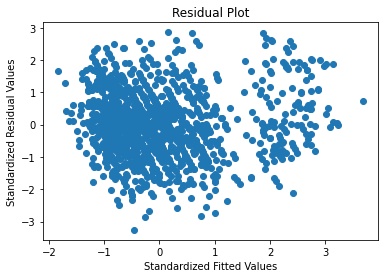

In [70]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Observations:
As observed in above figure, variance is  uniform/constant. So, There is homoscedacity.

### Let's predict new value using the same datasets

In [79]:
new_data=pd.DataFrame({'Age':70,'KM':61234,'HP':86,"cc":1300,"Doors":3,"Gears":5,'QT':210,'Weight':1170},index=[1])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
1,70,61234,86,1300,3,5,210,1170


In [80]:
model.predict(new_data)

1   -10424.880647
dtype: float64

In [83]:
models={'Different_Models':['Raw_data_Model','After_Removing_Detectors','After_mean_imputation_Model','After_median_imputation_Model','Final_Model'],
        'R_squared':[raw_data_model.rsquared,model_after_removal_outlier.rsquared,model_after_mean_imputation.rsquared,model_after_median_imputation.rsquared,model.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,model_after_removal_outlier.rsquared_adj,model_after_mean_imputation.rsquared_adj,model_after_median_imputation.rsquared_adj,model.rsquared_adj]}
      
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted
0,Raw_data_Model,0.900224,0.899620
1,After_Removing_Detectors,0.777689,0.777146
2,After_mean_imputation_Model,0.461361,0.460232
3,After_median_imputation_Model,0.342050,0.340671
4,Final_Model,0.900376,0.899773
